In [1]:
# Dataset: https://figshare.com/articles/dataset/CDEMRIS_fibrosis_scar_challenge_data_2012/4214532

# On Google Colab, upload the dataset to Google Drive and mount it.

from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [2]:
# Unzip the ZIP file.

! cp '/gdrive/My Drive/4214532.zip' '4214532.zip'
! unzip -q 4214532.zip
! ls

4214532.zip	  post.zip  READ_ME.txt  sample_segmentation.zip
LA_with_scar.png  pre.zip   sample_data


In [3]:
# Check "pre".

! unzip -q pre.zip
! ls pre

# There are 30 3D images in "pre".

p1   p11  p13  p15  p17  p19  p20  p22	p24  p26  p28  p3   p4	p6  p8
p10  p12  p14  p16  p18  p2   p21  p23	p25  p27  p29  p30  p5	p7  p9


In [4]:
! unzip -q post.zip
! ls post

# There are 30 3D images in "post".

p1   p11  p13  p15  p17  p19  p20  p22	p24  p26  p28  p3   p4	p6  p8
p10  p12  p14  p16  p18  p2   p21  p23	p25  p27  p29  p30  p5	p7  p9


In [5]:
# Randomly select one image.

! ls pre/p10

de_a_10.nrrd  la_seg_a_10.nrrd


In [6]:
# Install packages for reading NRRD files.

! pip install pynrrd

In [7]:
import nrrd

data, header = nrrd.read('pre/p10/de_a_10.nrrd')
print(data.shape)
print(header)

# The size of this 3D image is 480 * 480 * 40.

(480, 480, 40)
OrderedDict([('type', 'short'), ('dimension', 3), ('space', 'left-posterior-superior'), ('sizes', array([480, 480,  40])), ('space directions', array([[0.625, 0.   , 0.   ],
       [0.   , 0.625, 0.   ],
       [0.   , 0.   , 2.   ]])), ('kinds', ['domain', 'domain', 'domain']), ('endian', 'little'), ('encoding', 'raw'), ('space origin', array([0., 0., 0.]))])


In [8]:
print(data.dtype)
print("range: ({}, {})".format(data.min(), data.max()))

int16
range: (0, 639)


In [9]:
# Visualization

# Refer to https://stackoverflow.com/questions/58503081/3d-nrrd-image-visualization-matplotlib.

# napari doesn't work on Colab (notebooks)?

In [10]:
# Swap channels.

import numpy as np

data = np.moveaxis(data, -1, 0)
data.shape

print(data.shape)

(40, 480, 480)


In [11]:
# Refer to https://scikit-image.org/docs/dev/auto_examples/applications/plot_3d_image_processing.html.

# "Cut" the 3D images into 40 2D images and visualize two of them.

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

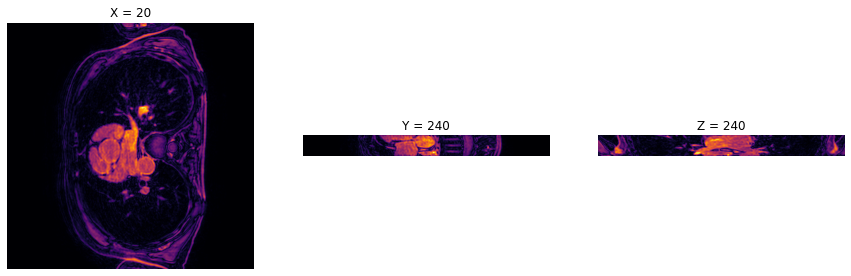

In [12]:
def show_plane(ax, plane, cmap="inferno", title=None):
    ax.imshow(plane, cmap=cmap)
    ax.axis("off")

    if title:
        ax.set_title(title)

(n_plane, n_row, n_col) = data.shape
_, (a, b, c) = plt.subplots(ncols=3, figsize=(15, 5))

show_plane(a, data[n_plane // 2], title=f'X = {n_plane // 2}')
show_plane(b, data[:, n_row // 2, :], title=f'Y = {n_row // 2}')
show_plane(c, data[:, :, n_col // 2], title=f'Z = {n_col // 2}')

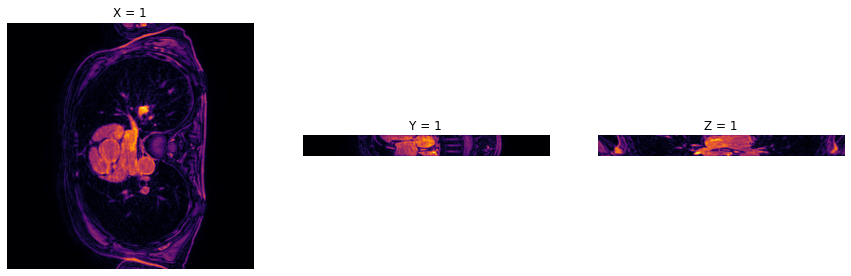

In [13]:
(n_plane, n_row, n_col) = data.shape
_, (a, b, c) = plt.subplots(ncols=3, figsize=(15, 5))

show_plane(a, data[n_plane // 2], title=f'X = {1}')
show_plane(b, data[:, n_row // 2, :], title=f'Y = {1}')
show_plane(c, data[:, :, n_col // 2], title=f'Z = {1}')

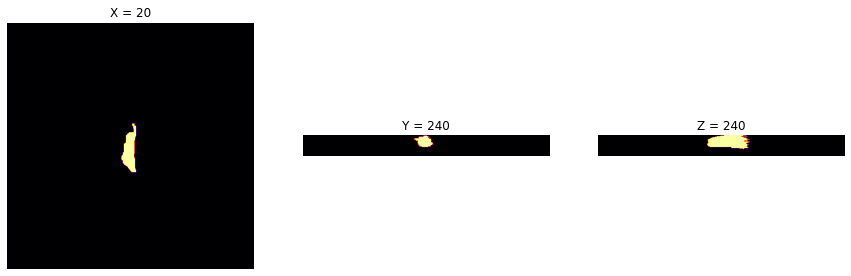

In [14]:
# Also, visualize the segmentation of the left atrial endocardium.

data_seg, header_seg = nrrd.read('pre/p10/la_seg_a_10.nrrd')

data_seg = np.moveaxis(data_seg, -1, 0)
data_seg.shape

(n_plane, n_row, n_col) = data_seg.shape
_, (a, b, c) = plt.subplots(ncols=3, figsize=(15, 5))

show_plane(a, data_seg[n_plane // 2], title=f'X = {n_plane // 2}')
show_plane(b, data_seg[:, n_row // 2, :], title=f'Y = {n_row // 2}')
show_plane(c, data_seg[:, :, n_col // 2], title=f'Z = {n_col // 2}')

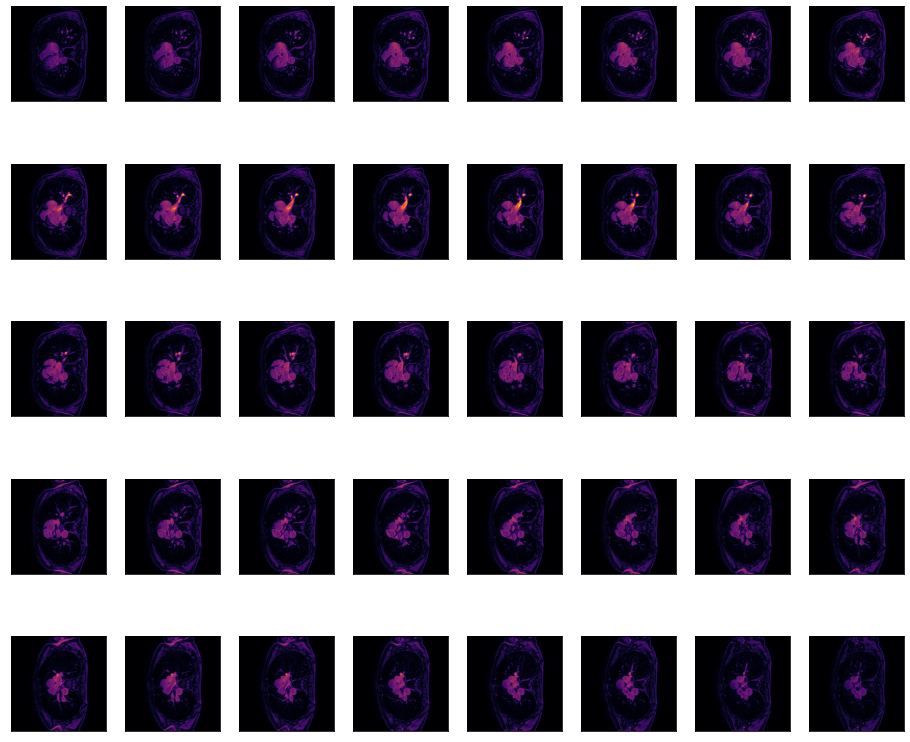

In [15]:
# Visualize all 2D images as well as the segementation.

def display(im3d, cmap="inferno", step=1):
    _, axes = plt.subplots(nrows=5, ncols=8, figsize=(16, 14))

    vmin = im3d.min()
    vmax = im3d.max()

    for ax, image in zip(axes.flatten(), im3d[::step]):
        ax.imshow(image, cmap=cmap, vmin=vmin, vmax=vmax)
        ax.set_xticks([])
        ax.set_yticks([])

display(data)

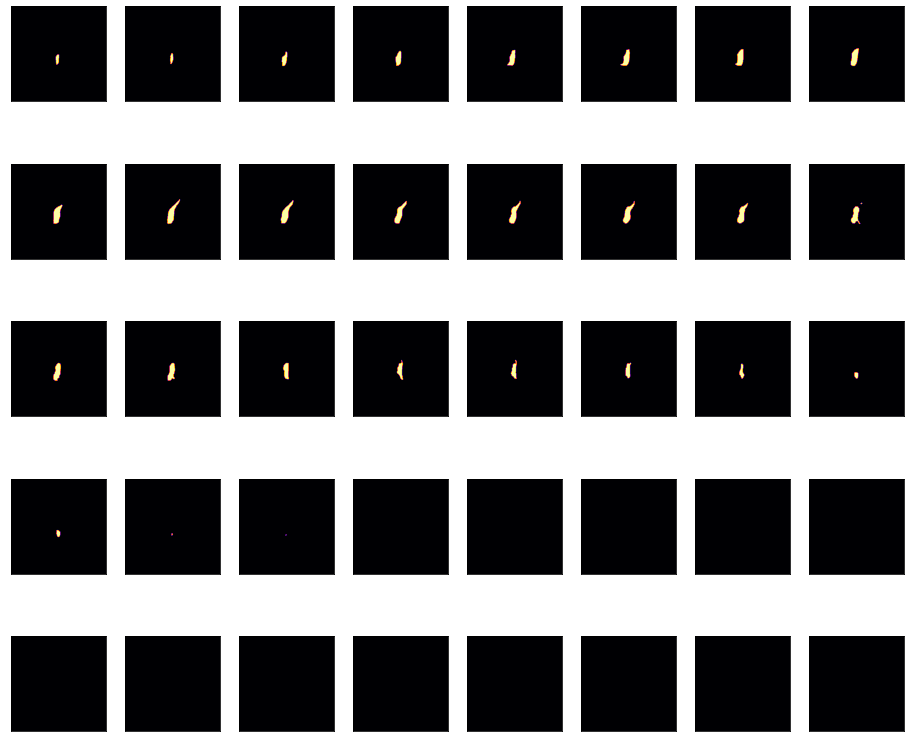

In [16]:
display(data_seg)